In [1]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'



In [2]:
# Read the data
data = pd.read_csv('trials.csv')
# Convert values from radians to degrees
data.target_angle = np.degrees(data.target_angle)
data.reported_angle = np.degrees(data.reported_angle)
# Compute error measures
data['error'] = data.reported_angle - data.target_angle
data['abserror'] = np.abs(data.error)

In [3]:
# Use only non-practice non-loop audio-only trials
data = data.query("is_audio_only == 1 and is_test == 1 and is_audio_loop == 0")
# Fake naive pilots to have a numerical sid
data.sid = data.sid.map(lambda v: dict(NP3="0", NP2="-1", NP1="-2").get(v, v))
# Use only "real" participants
data = data[data.sid.isin(map(str, range(-5, 20)))]
data.sid = data.sid.astype(int)
data = data.sort_values('sid')

# Use only first two blocks
data = data[data.seqno.isin([13, 14])]

In [4]:
# Compute per-participant median absolute error
per_subject_medians = data.groupby('sid').median()
print(per_subject_medians.abserror)

sid
-2      7.088719
-1      6.898875
 0      4.404189
 1      6.196931
 2      4.383699
 3      6.225251
 4      5.397187
 5      5.549652
 6      8.037746
 7      5.452796
 8      7.751667
 9      9.386097
 10     6.504349
 11     3.654513
 12     8.647318
 13     6.959617
 14    11.275769
 15     7.888508
Name: abserror, dtype: float64


Mean of medians: 6.761271235424393
Median of medians: 6.701612026727184
Std of medians: 1.901196156423202
Quartiles of medians: 0.25    5.477010
0.75    7.854298
Name: abserror, dtype: float64


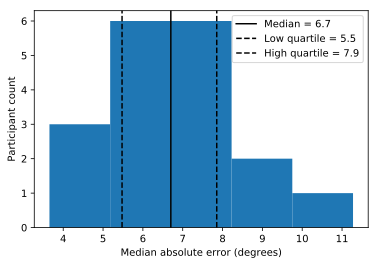

In [5]:
plt.hist(per_subject_medians.abserror, bins=5)
lq, median, hq = per_subject_medians.abserror.quantile([0.25, 0.5, 0.75])
plt.axvline(median, color='black', label=f'Median = {median:.1f}')
plt.axvline(lq, color='black', ls='dashed', label=f'Low quartile = {lq:.1f}')
plt.axvline(hq, color='black', ls='dashed', label=f'High quartile = {hq:.1f}')

plt.xlabel('Median absolute error (degrees)')
plt.ylabel('Participant count')
plt.legend()
print("Mean of medians:", per_subject_medians.abserror.mean())
print("Median of medians:", per_subject_medians.abserror.median())
print("Std of medians:", per_subject_medians.abserror.std())
print("Quartiles of medians:", per_subject_medians.abserror.quantile([0.25, 0.75]))

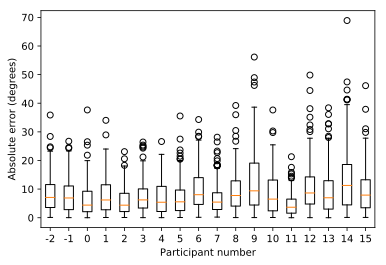

In [6]:
# Get all per-subject errors
per_subject_abserrors = []
sids = []
for s, sd in data.groupby('sid'):
    sids.append(s)
    per_subject_abserrors.append(sd.abserror)

plt.boxplot(per_subject_abserrors);
plt.setp(plt.gca(),
        xticks=np.arange(len(sids))+1,
        xticklabels=sids);
plt.xlabel('Participant number')
plt.ylabel('Absolute error (degrees)');


In [7]:
# Compute per-participant standard deviations
per_subject_stds = data.groupby('sid').std()
print(per_subject_stds.error)

sid
-2     10.418007
-1      8.787286
 0      8.721972
 1      9.631558
 2      7.247159
 3      9.118614
 4      9.237532
 5      9.022859
 6     11.632600
 7      8.343157
 8     11.588802
 9     16.296266
 10    11.334927
 11     6.244829
 12    13.320494
 13    11.834639
 14    15.853081
 15    12.531249
Name: error, dtype: float64


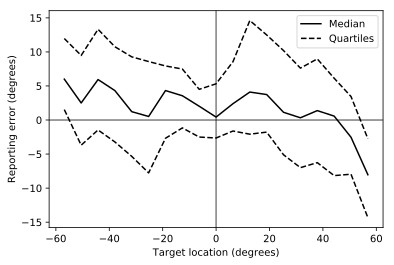

In [8]:
#plt.plot(data.target_angle, data.error, 'k.', alpha=0.1)
plt.axhline(0, color='black', alpha=0.5)
plt.axvline(0, color='black', alpha=0.5)
bins = np.linspace(-60, 60, 20)
target_bins = np.digitize(data.target_angle, bins)
#print(np.median(data.error[target_bins == 1]))
target_error_qs = [
    np.percentile(data.error.values[target_bins == b], [25, 50, 75])
    #data.error[target_bins == b]
    for b in range(1, len(bins))]

x = bins[1:] - np.median(np.diff(bins))/2
ys = np.array(target_error_qs)
plt.plot(x, ys[:,1], color='black', label='Median')
plt.plot(x, ys[:,0], color='black', ls='dashed', label='Quartiles')
plt.plot(x, ys[:,2], color='black', ls='dashed')
rng = np.linspace(-60, 60, 100)
#plt.plot(rng, -rng*0.03 + 2.0)
plt.xlabel("Target location (degrees)")
plt.ylabel("Reporting error (degrees)")
plt.legend();
